In [1]:
from shutil import copyfile

# copying the test database (this is just for repeated testing)
src = 'C:/Users/Owen/Documents/Academic/CNERG/cycsat/simulations/four_reactors.sqlite'
dst = 'C:/Users/Owen/Documents/Academic/CNERG/cycsat/reactor_test_sample.sqlite'
copyfile(src, dst)

'C:/Users/Owen/Documents/Academic/CNERG/cycsat/reactor_test_sample.sqlite'

## import key libraries

In [2]:
from cycsat.archetypes import Facility, Feature, Shape, Rule
from cycsat.simulation import CycSat
from cycsat.shapes import Circle, Rectangle

%matplotlib inline

## define the facilities

In [3]:
# this loads a cyclus simulation
sim = CycSat('reactor_test_sample.sqlite')

In [4]:
SampleReactor = Facility(name='test reactor',width=2000,length=2000)

ConcretePad = Feature(name='concrete pad')
ConcretePad.level = 0
ConcretePad.visibility = 100
ConcretePad.shapes = [Rectangle(width=700,length=685,rgb=[155,155,155])]
ConcretePad.rules = [Rule(oper='ROTATE',value=20)]
SampleReactor.features.append(ConcretePad)

BuildingSet = Feature(name='building set')
BuildingSet.level = 1
BuildingSet.visibility = 100
BuildingSet.shapes = [Rectangle(width=73,length=13,rgb=[70,70,70])]
BuildingSet.rules = [Rule(oper='WITHIN',target='concrete pad'),
                     Rule(oper='ROTATE',target='concrete pad')]
SampleReactor.features.append(BuildingSet)


CoolingTower1 = Feature(name='cooling tower 1')
CoolingTower1.level = 1
CoolingTower1.visibility = 100
CoolingTower1.shapes = [Circle(radius=110,rgb=[70,70,70])]
CoolingTower1.rules = [Rule(oper='WITHIN',target='concrete pad')]
SampleReactor.features.append(CoolingTower1)

# all Agent's in the CYCLUS database with a Spec "Reactor" will be drawn 
# with the template SampleReactor (defined above)
templates = {
    'Reactor' : SampleReactor,
}

## build and explore facilities

In [5]:
sim.build(name='test_build',templates=templates)

In [6]:
# look at the built facilities
sim.facilities

,id,AgentId,name,width,length,terrain,prototype,template,defined,ax_angle,wkt,site_id,build_id,obj
0,2,19,test reactor,2000,2000,None,Reactor,False,True,None,None,None,1,<cycsat.archetypes.Facility object at 0x000001...
1,3,20,test reactor,2000,2000,None,Reactor,False,True,None,None,None,1,<cycsat.archetypes.Facility object at 0x000001...
2,4,21,test reactor,2000,2000,None,Reactor,False,True,None,None,None,1,<cycsat.archetypes.Facility object at 0x000001...
3,5,22,test reactor,2000,2000,None,Reactor,False,True,None,None,None,1,<cycsat.archetypes.Facility object at 0x000001...


(<matplotlib.figure.Figure at 0x1ee739f3fd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ee739f7e80>)

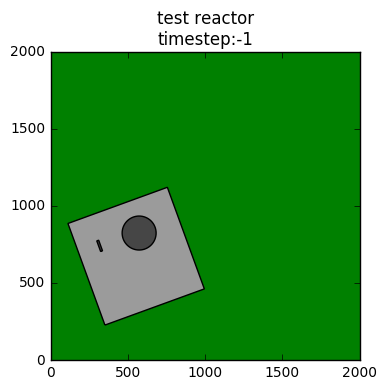

In [7]:
# plot a single facility with pandas
sim.facilities.ix[1].obj.plot()

(<matplotlib.figure.Figure at 0x1ee73a83cc0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE73AD3BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EE73B32B70>], dtype=object))

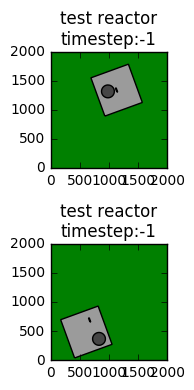

In [8]:
# plot mulitple facilities with a sql query
sim.plot(sql='AgentId > 20')

In [9]:
# look at the different builds
sim.builds

,id,name,obj
0,1,test_build,<cycsat.archetypes.Build object at 0x000001EE7...


## run the simulation and plot gifs

In [10]:
sim.simulate(1)